In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf test_folder
!rm -rf output_folder
!mkdir output_folder
!mkdir test_folder

In [ ]:
for x in range (3,6):
  print(x)

3
4
5


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

import tensorflow.compat.v1 as tf
import tensorflow.compat.v1.lite as lite
tf.disable_v2_behavior()
tf.autograph.set_verbosity(
    0,
    alsologtostdout=True
)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    # Extract frozen graph from tar archive.
    tar_file = tarfile.open(tarball_path)
    for tar_info in tar_file.getmembers():
      if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.compat.v1.GraphDef.FromString(file_handle.read())
        break

    tar_file.close()

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')
    self.sess = tf.Session(graph=self.graph)

  def run(self, image, is_portrait): # 
    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map

In [ ]:
LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
    'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
    'train', 'tv'
])

In [ ]:
MODEL_URL = 'http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz'
_TARBALL_NAME = "deeplab.tar.gz"
model_dir = tempfile.mkdtemp()
tf.io.gfile.mkdir(model_dir)

download_path = os.path.join(model_dir, _TARBALL_NAME)
print('Sedang download model, tunggu sebentar...')
urllib.request.urlretrieve(MODEL_URL,
                   download_path)
print('Download Berhasil! Loading model...')

MODEL = DeepLabModel(download_path)
print('Model loaded successfully!')

Sedang download model, tunggu sebentar...
Download Berhasil! Loading model...
Model loaded successfully!


In [ ]:
import cv2
import os

def video_to_jpeg(input_video, folder_path, fps_input, fps_output):
  cam = cv2.VideoCapture(input_video)
  currentFrame = 0
  index = 0
  limiter = int(fps_input / fps_output)
  print("Generate image sequence - START")
  while(True): 

      # reading from frame 
      ret,frame = cam.read() 

      if ret:
        if (index % limiter == 0):
          # if video is still left continue creating images 
          name = folder_path + "/" + str(currentFrame) + '.jpg'
          # writing the extracted images 
          cv2.imwrite(name, frame) 

          # increasing counter so that it will 
          # show how many frames are created 
          currentFrame += 1
        index += 1
      else: 
          break
  print("Generate image sequence - FINISHED")
  print(currentFrame-1, "Image Created")
  # Release all space and windows once done 
  cam.release() 
  cv2.destroyAllWindows()
  return currentFrame-1

In [ ]:
video_path = "/content/drive/MyDrive/_carvideo/50_3.mp4"
folder_temp = "test_folder"
print("Video berhasil dimuat!")
fps_input = 60
fps_output = 60
fps_render = 5
jumlah_frame = video_to_jpeg(video_path, folder_temp, fps_input, fps_output)

Video berhasil dimuat!
Generate image sequence - START
Generate image sequence - FINISHED
96 Image Created


In [ ]:
def titikKanan(seg_map, code):
  y, x = seg_map.shape
  for j in range(x-1, 0, -1):
    for i in range(0, y):
      if (seg_map[i][j] == code):
        return (j, i)
        print("i = ", i, ", j =", j)
  return (0,0)

def titikKiri(seg_map, code):
  y, x = seg_map.shape
  for j in range(0, x):
    for i in range(0, y):
      if (seg_map[i][j] == code):
        return (j, i)
  return (0,0)

def getCarFront(image_file, code_car):
  f = open(image_file, "rb")
  jpg_str = f.read()
  f.close()
  original_im = Image.open(BytesIO(jpg_str))
  resized_image, seg_map = MODEL.run(original_im, False)
  kanan = titikKanan(seg_map, code_car)
  #kanan = titikKiri(seg_map, code_car)
  return resized_image, seg_map, kanan

Extract frame 0
No Car Detected in frame 0 done -  1.6462631225585938 detik
Extract frame 1
No Car Detected in frame 1 done -  0.822674036026001 detik
Extract frame 2
No Car Detected in frame 2 done -  0.8483223915100098 detik
Extract frame 3
No Car Detected in frame 3 done -  0.8422443866729736 detik
Extract frame 4
No Car Detected in frame 4 done -  0.8162856101989746 detik
Extract frame 5
No Car Detected in frame 5 done -  0.8032658100128174 detik
Extract frame 6
No Car Detected in frame 6 done -  0.7859582901000977 detik
Extract frame 7
No Car Detected in frame 7 done -  0.8010914325714111 detik
Extract frame 8
No Car Detected in frame 8 done -  0.8108634948730469 detik
Extract frame 9
No Car Detected in frame 9 done -  0.8194091320037842 detik
Extract frame 10
No Car Detected in frame 10 done -  0.7936766147613525 detik
Extract frame 11
Extract frame 11 done -  0.9269373416900635 detik
Extract frame 12
Extract frame 12 done -  0.993842363357544 detik
Extract frame 13
Extract frame

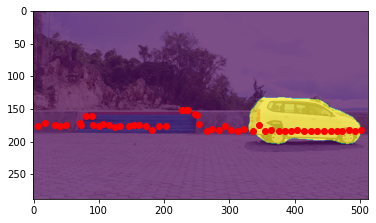

In [ ]:
from time import time

code_car = 7
list_image = []
list_segmented_image = []
list_right_point = []
output_frames = []

output_folder = "output_folder/"
for i in range(jumlah_frame):
  awal = time()
  print("Extract frame", i)
  resized_image, seg_map, kanan = getCarFront(folder_temp+"/"+str(i)+".jpg", code_car)
  if (kanan[0] > 0 and kanan[0] < 512):
    list_image.append(resized_image)
    list_segmented_image.append(seg_map)
    list_right_point.append(kanan)
    plt.imshow(resized_image)
    plt.imshow(seg_map, alpha=0.7)
    plt.scatter(kanan[0], kanan[1], color="r")
    plt.savefig(output_folder+str(i)+".jpg")
    #plt.clf()
    output_frames.append(i)
    print("Extract frame", i, "done - ", time() - awal, "detik")
  else:
    print("No Car Detected in frame", i,"done - ", time() - awal, "detik")
print("Proses deteksi objek selesai!")

In [ ]:
panjang_lintasan = 11.57 # dalam meter
frame_period = 1 / fps_output

In [ ]:
def groupingPoint(input_array, batas_kiri, batas_kanan):
  output = []
  for i in range(len(input_array)):
    if (input_array[i][0] > batas_kiri and input_array[i][0] < batas_kanan):
      output.append(input_array[i][0])
  return output

def find_delta(input_array):
  output = []
  for i in range(len(input_array)-1):
    output.append(input_array[i+1] - input_array[i])
  return output

def delta_to_meter(delta, pixel_per_meter):
  return delta * pixel_per_meter

def ms_to_kmh(velocity_in_ms):
  return velocity_in_ms * 3.6

In [ ]:
titik = groupingPoint(list_right_point, 0, 512)
delta = find_delta(titik)
pixel_per_meter = panjang_lintasan/512
print(titik)
print(delta)

[7, 18, 33, 41, 49, 72, 71, 81, 89, 91, 100, 107, 116, 125, 133, 146, 154, 162, 172, 181, 192, 203, 228, 233, 236, 248, 251, 254, 266, 274, 284, 294, 303, 314, 323, 336, 345, 354, 364, 376, 385, 395, 404, 415, 425, 435, 445, 456, 465, 473, 483, 492, 502]
[11, 15, 8, 8, 23, -1, 10, 8, 2, 9, 7, 9, 9, 8, 13, 8, 8, 10, 9, 11, 11, 25, 5, 3, 12, 3, 3, 12, 8, 10, 10, 9, 11, 9, 13, 9, 9, 10, 12, 9, 10, 9, 11, 10, 10, 10, 11, 9, 8, 10, 9, 10]


In [ ]:
delta_mean = sum(delta)/len(delta)
delta_in_m = delta_mean * pixel_per_meter
velocity_in_ms = delta_in_m / frame_period

In [ ]:
frame_period

0.016666666666666666

In [ ]:
delta_mean

9.51923076923077

In [ ]:
delta_in_m

0.21511230468750003

In [ ]:
velocity_in_ms

12.906738281250002

In [ ]:
print("Hasil kecepatan: ", ms_to_kmh(velocity_in_ms)," km/jam")
#ms_to_kmh(velocity_in_ms)

Hasil kecepatan:  46.46425781250001  km/jam


In [ ]:
import glob
img_array = []
for i in output_frames:
    filename = "output_folder/"+str(i)+".jpg"
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
video_file = "output_folder/35_3.mp4"
fps = 2
image_size = img_array[0].shape
out = cv2.VideoWriter(video_file, cv2.VideoWriter_fourcc(*'MP4V'), fps_render, (image_size[1], image_size[0]))
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
!cp -r /content/output_folder /content/drive/MyDrive/img_kiri